<a href="https://colab.research.google.com/github/chayanisbun/creditcard-clustering/blob/main/Feature_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_card.csv to credit_card.csv


In [ ]:
df = pd.read_csv('credit_card.csv')

In [ ]:
# Drop irrelevant features
df.drop(columns=['Unnamed: 0'], inplace=True)

# Replace outliers and null values with 0

## Replace null values with 0

In [ ]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Replace outliers values with 0


In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean and standard deviation for numeric columns
mean = df[numeric_cols].mean()
std = df[numeric_cols].std()

# Identify outliers (values that are more than 3 standard deviations away from the mean)
outliers = (df[numeric_cols] - mean).abs() > (3 * std)

# Replace outliers with 0
df[numeric_cols] = df[numeric_cols].mask(outliers, 0)

In [ ]:
# Display the first few rows of the cleaned dataframe
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

# Check the variance of features

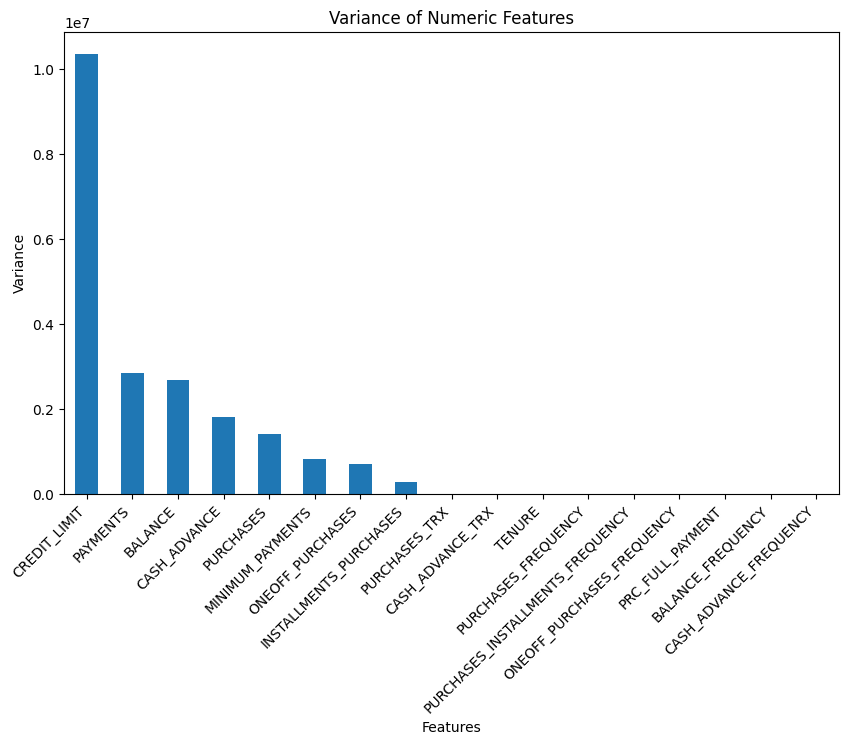

In [ ]:
variance = df[numeric_cols].var()

# Sort variance in descending order
sorted_variance = variance.sort_values(ascending=False)

# Plotting the variance of features
plt.figure(figsize=(10, 6))
sorted_variance.plot(kind='bar')
plt.title('Variance of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.show()

# Check for correlations

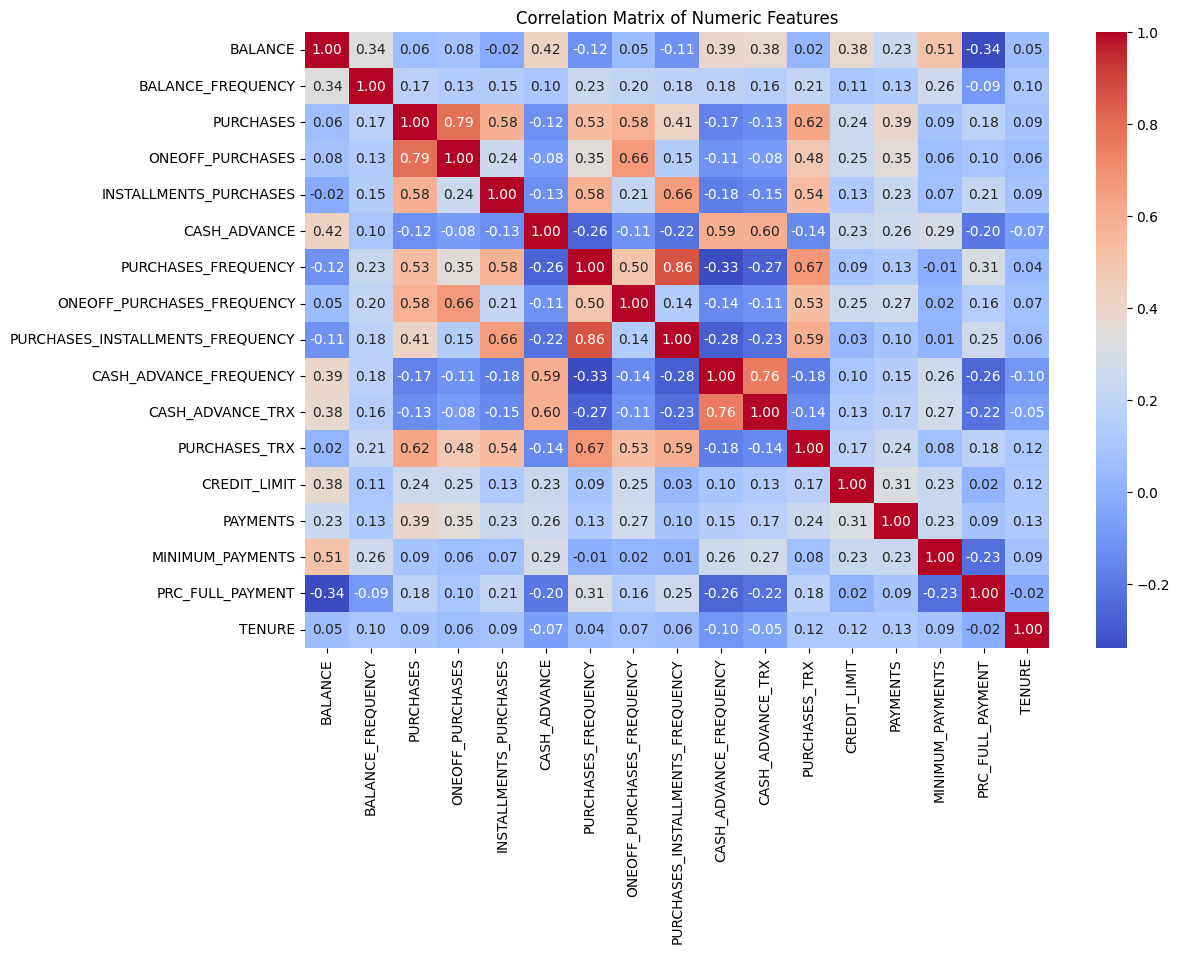

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Domain Understanding

In [ ]:
# Final features selected based on variance, correlation, and domain understanding
final_features = ['CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES', 'CASH_ADVANCE']

print("Final selected features for K-means clustering:", final_features)

Final selected features for K-means clustering: ['CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES', 'CASH_ADVANCE']
